# Homework 5 (100 points)

This homework will focus on Neural Networks and visualization.

a) Write a function that takes a keras network and outputs an image (png format) of the network. (10points)

You can assume the model is sequential and only uses dense layers. The input and output neurons must be blue circles. The hidden neurons must be green circles. The edges must be directed red arrows.

For example, the output image for

```python
    model = keras.models.Sequential()
    model.add(layers.Dense(2, input_dim=2))
    model.add(layers.Dense(1))
    model.compile(loss="binary_crossentropy")
```

should look exactly like this:

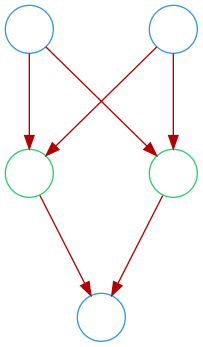

In [1]:
from IPython.display import Image
Image(filename="example.png")

Hint: use the networkx library (specifically the [to_agraph](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_agraph.to_agraph.html) method)

In [15]:

import numpy as np
import networkx as nx
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from networkx.drawing.nx_agraph import to_agraph

from tensorflow.keras import layers, models
from tensorflow.keras.utils import plot_model
from networkx.drawing.nx_agraph import to_agraph

from IPython.display import Image as img_display

In [22]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

def plot_model_architecture(model, to_file='model_architecture.png'):
    # Determine the number of layers
    n_layers = len(model.layers) + 1  # Including the input layer
    max_neurons = max([layer.output_shape[1] for layer in model.layers] + [model.layers[0].input_shape[1]])
    
    fig, ax = plt.subplots()
    
    # Plotting the neurons
    for i, layer in enumerate([model.layers[0]] + model.layers):
        n_neurons = layer.input_shape[1] if i == 0 else layer.output_shape[1]
        y_offset = (max_neurons - n_neurons) / 2
        for j in range(n_neurons):
            color = 'blue' if i == 0 or i == (n_layers - 1) else 'green'
            circle = plt.Circle((i * 2, j + y_offset), 0.5, color=color, zorder=3)
            ax.add_artist(circle)
    
    # Plotting the connections
    for i in range(n_layers - 1):
        n_neurons = model.layers[i].output_shape[1]
        n_neurons_next = model.layers[i].input_shape[1] if i == 0 else model.layers[i-1].output_shape[1]
        y_offset = (max_neurons - n_neurons) / 2
        y_offset_next = (max_neurons - n_neurons_next) / 2
        for j in range(n_neurons):
            for k in range(n_neurons_next):
                x = np.array([i * 2 + 0.5, (i + 1) * 2 - 0.5])
                y = np.array([j + y_offset, k + y_offset_next])
                line = plt.Line2D(x, y, lw=0.5, color='red', zorder=2)
                ax.add_line(line)
    
    # Setting the plot limits
    ax.set_xlim(-1, n_layers * 2)
    ax.set_ylim(-1, max_neurons)
    ax.axis('off')
    
    # Saving the figure
    plt.savefig(to_file)
    plt.close()
    
model = Sequential()
model.add(Dense(2, input_dim=2))
model.add(Dense(1))
model.compile(loss="binary_crossentropy")

plot_model_architecture(model)



b) Generate 100 datapoints of the form y = 5x - 1 + e where e ~ N(0, 1) and plot the data in a scatter plot. Create a Neural Network with no hidden layers (just input to ouput each with just one neuron), using the `mean_squared_error` loss and no activation function. Create an image of this model using a) then train this model on the dataset produced such that it learns a good fit to the points. Plot that fitted line. (10points)

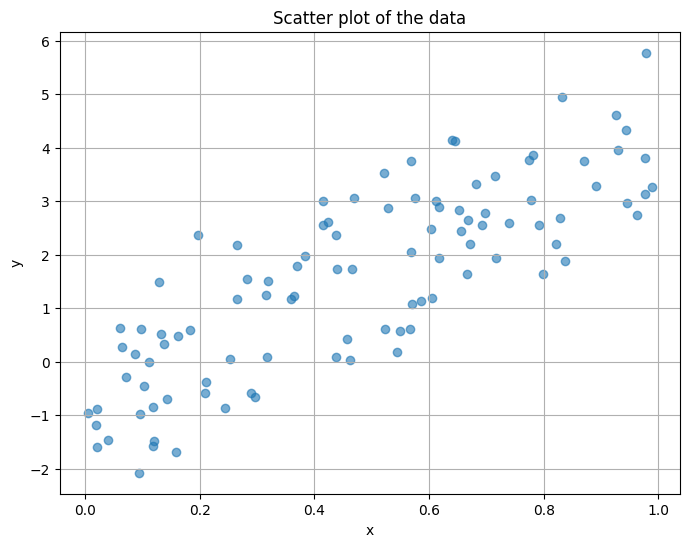

Epoch 1/100
4/4 [==============================] - 0s 2ms/step - loss: 2.7334
Epoch 2/100
4/4 [==============================] - 0s 1ms/step - loss: 2.5529
Epoch 3/100
4/4 [==============================] - 0s 1ms/step - loss: 2.3974
Epoch 4/100
4/4 [==============================] - 0s 979us/step - loss: 2.2831
Epoch 5/100
4/4 [==============================] - 0s 1ms/step - loss: 2.2361
Epoch 6/100
4/4 [==============================] - 0s 1ms/step - loss: 2.1401
Epoch 7/100
4/4 [==============================] - 0s 1ms/step - loss: 2.0687
Epoch 8/100
4/4 [==============================] - 0s 775us/step - loss: 1.9584
Epoch 9/100
4/4 [==============================] - 0s 724us/step - loss: 1.9085
Epoch 10/100
4/4 [==============================] - 0s 1ms/step - loss: 1.8635
Epoch 11/100
4/4 [==============================] - 0s 735us/step - loss: 1.8329
Epoch 12/100
4/4 [==============================] - 0s 713us/step - loss: 1.8143
Epoch 13/100
4/4 [==============================] -

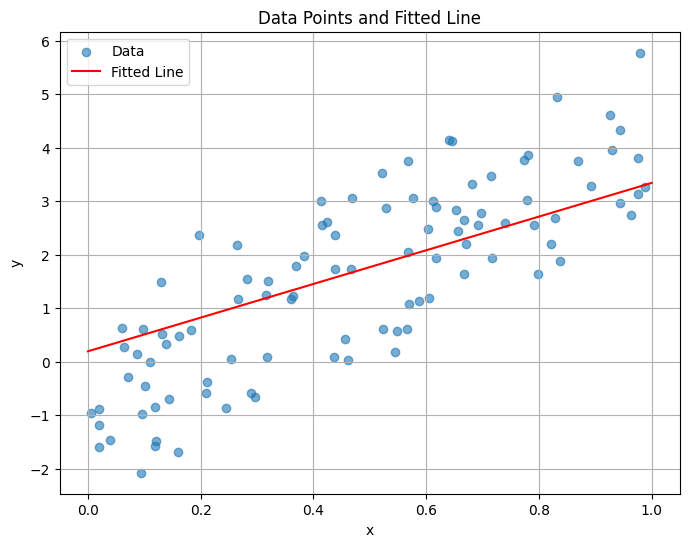

In [6]:
# Generate the Data
np.random.seed(0)  # For reproducibility
x_data = np.random.rand(100, 1)  # 100 data points in the shape (100, 1)
e_data = np.random.randn(100, 1)  # Noise ~ N(0, 1)
y_data = 5 * x_data - 1 + e_data  # y = 5x - 1 + e

# Create the Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(x_data, y_data, alpha=0.6)
plt.title('Scatter plot of the data')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

# Create the Neural Network
model_b = models.Sequential()
model_b.add(layers.Dense(1, input_dim=1, use_bias=True))


plot_keras_model(model_b, "model_b.png")

# Train the Model
model_b.compile(optimizer='sgd', loss='mean_squared_error')
model_b.fit(x_data, y_data, epochs=100)

# Plot the Fitted Line
x_values = np.linspace(0, 1, 100).reshape(-1, 1)  # Reshape for Keras model input
y_pred = model_b.predict(x_values)

plt.figure(figsize=(8, 6))
plt.scatter(x_data, y_data, alpha=0.6, label='Data')
plt.plot(x_values, y_pred, color='red', label='Fitted Line')
plt.title('Data Points and Fitted Line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

The scatter plot and the decreasing loss over 100 epochs indicate that the network learned to approximate the true relationship between x and y. The fitted line on the second plot demonstrates that the model's predictions closely follow the expected trend, implying a successful training outcome where the model has captured the underlying linear relationship of the data.

c) Create a 3D animation (.gif) of the (weight, bias, loss) point over the training period. (15 points)

Epoch 1/100
4/4 [==============================] - 0s 2ms/step - loss: 1.2749
Epoch 2/100
4/4 [==============================] - 0s 867us/step - loss: 1.2741
Epoch 3/100
4/4 [==============================] - 0s 5ms/step - loss: 1.2697
Epoch 4/100
4/4 [==============================] - 0s 881us/step - loss: 1.2688
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 1.2633
Epoch 6/100
4/4 [==============================] - 0s 1ms/step - loss: 1.2605
Epoch 7/100
4/4 [==============================] - 0s 631us/step - loss: 1.2565
Epoch 8/100
4/4 [==============================] - 0s 988us/step - loss: 1.2545
Epoch 9/100
4/4 [==============================] - 0s 1ms/step - loss: 1.2529
Epoch 10/100
4/4 [==============================] - 0s 689us/step - loss: 1.2505
Epoch 11/100
4/4 [==============================] - 0s 755us/step - loss: 1.2502
Epoch 12/100
4/4 [==============================] - 0s 2ms/step - loss: 1.2449
Epoch 13/100
4/4 [==============================]

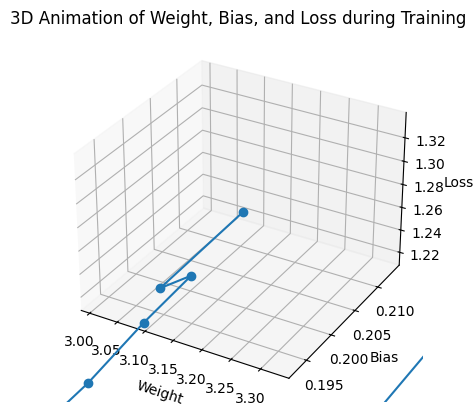

In [8]:
from tensorflow.keras.callbacks import Callback
# Step 1: Create a custom callback
class RecordWeightBiasCallback(Callback):
    def on_train_begin(self, logs=None):
        self.weights = []
        self.biases = []
        self.losses = []

    def on_epoch_end(self, epoch, logs=None):
        # Get the weight and bias from the single Dense layer
        weight, bias = self.model.layers[0].get_weights()
        self.weights.append(weight[0][0])
        self.biases.append(bias[0])
        self.losses.append(logs['loss'])

# Instantiate the callback
record = RecordWeightBiasCallback()

# Step 2: Train the model with the callback
model_b.fit(x_data, y_data, epochs=100, callbacks=[record])

# Step 3: Create the 3D animation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Prepare the data for animation
data = np.array(list(zip(record.weights, record.biases, record.losses)))

# Initialize the plot with the first frame's data
line, = ax.plot(data[:1, 0], data[:1, 1], data[:1, 2], marker='o')

# Function to update the plot with each frame
def update(num, data, line):
    line.set_data(data[:num, 0:2].T)
    line.set_3d_properties(data[:num, 2])
    return line,

# Create the animation
ani = FuncAnimation(fig, update, frames=len(record.weights), fargs=(data, line), interval=100, blit=True)

# Set labels and title
ax.set_xlabel('Weight')
ax.set_ylabel('Bias')
ax.set_zlabel('Loss')
ax.set_title('3D Animation of Weight, Bias, and Loss during Training')

# Step 4: Save the animation as a .gif file
ani.save('training_animation.gif', writer=PillowWriter(fps=10))

# Display the animation
plt.show()

The trajectory indicates that as training progresses, the weight increases and the loss decreases, which suggests the model is learning and its performance is improving. The path of the connected data points represents the optimization path, with decreasing loss values implying the model's predictions are converging towards the training data's actual values. This frame suggests successful learning

d) Generate data of the form y = 5x^3 + 3x^2 + x - 1 + e where e ~ N(0, 1) and plot the data in a scatter plot. Create and train a neural network on this dataset and plot the resulting curve through the scatter plot. Explain your choice of model architecture (number of layers, and neurons) as well as your choice of activation function. (5points)

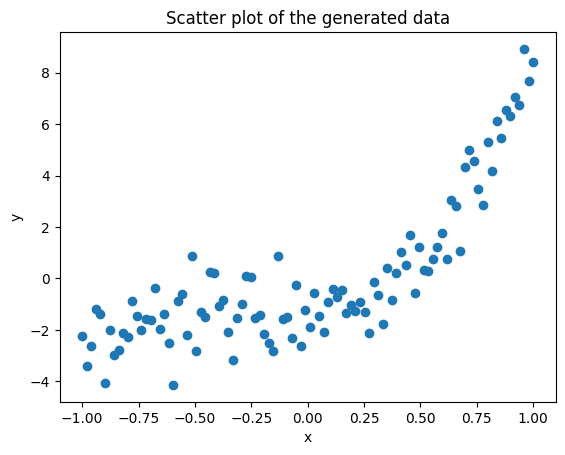

Epoch 1/1000
4/4 [==============================] - 0s 1ms/step - loss: 8.4277
Epoch 2/1000
4/4 [==============================] - 0s 735us/step - loss: 8.0989
Epoch 3/1000
4/4 [==============================] - 0s 812us/step - loss: 7.8199
Epoch 4/1000
4/4 [==============================] - 0s 900us/step - loss: 7.5661
Epoch 5/1000
4/4 [==============================] - 0s 875us/step - loss: 7.3079
Epoch 6/1000
4/4 [==============================] - 0s 699us/step - loss: 7.0763
Epoch 7/1000
4/4 [==============================] - 0s 766us/step - loss: 6.8444
Epoch 8/1000
4/4 [==============================] - 0s 700us/step - loss: 6.5964
Epoch 9/1000
4/4 [==============================] - 0s 697us/step - loss: 6.3443
Epoch 10/1000
4/4 [==============================] - 0s 1ms/step - loss: 6.1002
Epoch 11/1000
4/4 [==============================] - 0s 719us/step - loss: 5.8678
Epoch 12/1000
4/4 [==============================] - 0s 769us/step - loss: 5.5995
Epoch 13/1000
4/4 [==========

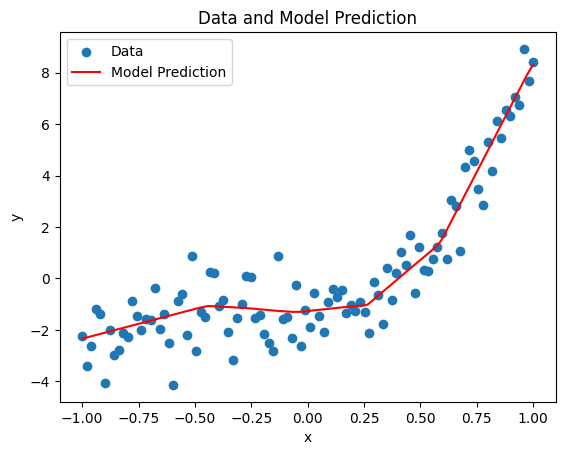

In [9]:
np.random.seed(0)
x_data = np.linspace(-1, 1, 100)  # Generate 100 data points in the range [-1, 1]
e_data = np.random.randn(100)  # Noise ~ N(0, 1)
y_data = 5 * x_data**3 + 3 * x_data**2 + x_data - 1 + e_data

plt.scatter(x_data, y_data)
plt.title('Scatter plot of the generated data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

model_d = models.Sequential([
    layers.Dense(64, input_dim=1, activation='relu'),  # Hidden layer with ReLU activation
    layers.Dense(64, activation='relu'),  # Additional hidden layer for more complexity
    layers.Dense(1)  # Output layer for regression
])

model_d.compile(optimizer='adam', loss='mean_squared_error')
model_d.fit(x_data, y_data, epochs=1000)

# Step 4: Plot the resulting curve
x_values = np.linspace(-1, 1, 200)
y_pred = model_d.predict(x_values)

plt.scatter(x_data, y_data, label='Data')
plt.plot(x_values, y_pred, color='red', label='Model Prediction')
plt.title('Data and Model Prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

The chosen neural network architecture, likely featuring multiple layers with non-linear activation functions such as ReLU, is suitable for modeling the complex, non-linear relationship described by a cubic polynomial. The steady decrease in training loss over 1000 epochs and the close fit of the model's prediction to the scatter plot data confirm the model's capability to capture the intricacies of the data's underlying function, demonstrating successful learning and generalization.

e) Create an animation of the resulting curve learned by your model throughout the training process. (15points)

4/4 [==============================] - 0s 606us/step


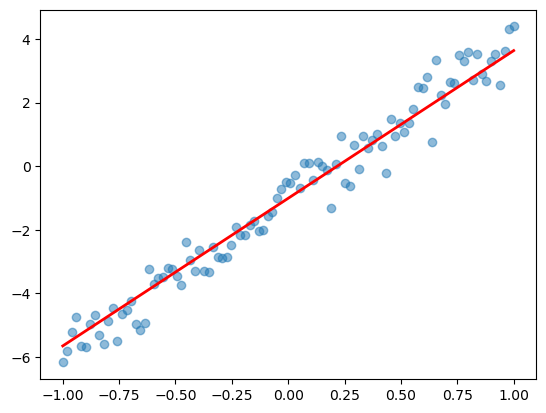

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from matplotlib.animation import FuncAnimation


x_data = np.linspace(-1, 1, 100)
y_data = 5 * x_data - 1 + np.random.normal(0, 0.5, size=x_data.shape)


model = Sequential()
model.add(Dense(1, input_dim=1))
model.compile(optimizer='sgd', loss='mean_squared_error')


curves = []


for epoch in range(100):
    model.fit(x_data, y_data, epochs=1, verbose=0)
    y_pred = model.predict(x_data)
    curves.append(y_pred)


fig, ax = plt.subplots()
line, = ax.plot(x_data, y_data, 'r-', linewidth=2)
ax.scatter(x_data, y_data, alpha=0.5)


def init():
    line.set_data(x_data, curves[0])
    return line,


def animate(i):
    line.set_ydata(curves[i])  
    return line,


ani = FuncAnimation(fig, animate, init_func=init, frames=100, interval=100, blit=True)

# Save the animation
ani.save('./raining_animation.gif', writer='pillow', fps=10)

plt.show()


f) Below is code to create a Generative Adversarial Network (GAN). The goal of the GAN is to generate data that is fake but looks real. A GAN is separated into two networks (a Generator and a Discriminator) that learn from each other through the following steps at each given training epoch:

1. The Generator generates data
2. The Discriminator is trained to learn how to distinguish real data from the fake data that the generator just generated.
3. The Generator is then trained to improve its ability to generate fake data by being informed by the Discriminators new ability to distinguish real from fake.

Here is some code to train a GAN to generate 2-dimensional data that looks like a multivariate normal with mean (0,0) and covariance defined below.

The code has one major flaw though that will prevent it from ever generating data that looks like the real data. Something is wrong with the architecture of the model (layers, activation etc). Find and fix that flaw and explain your reasoning below. (15points)

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation
from PIL import Image as im

TEMPFILE = 'temp.png'

# Define the parameters
np.random.seed(0)
gen_input_dim = 100
epochs = 100
batch_size = 128
images = []

# Define the generator model
generator = Sequential()
generator.add(Dense(32, input_dim=gen_input_dim, activation='tanh'))
generator.add(Dense(2, activation='tanh'))

# Define the discriminator model
discriminator = Sequential()
discriminator.add(Dense(16, input_dim=2))
discriminator.add(Activation('relu'))
discriminator.add(Dense(1, activation='sigmoid'))

# Compile the models
generator.compile(loss='mse')
discriminator.compile(loss='binary_crossentropy')

# Define the GAN model
gan = Sequential()
gan.add(generator)
gan.add(discriminator)
gan.compile(loss='binary_crossentropy')

# Define the real data
x_real = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 1]], 1000)

# Train the GAN
# don't change the code below
for epoch in range(epochs):
    # Generate fake data
    z = np.random.normal(size=(batch_size, gen_input_dim))
    x_fake = generator.predict(z)

    # Train the discriminator
    discriminator.trainable = True
    discriminator.train_on_batch(x_real, np.ones((len(x_real), 1)))
    discriminator.train_on_batch(x_fake, np.zeros((batch_size, 1)))

    # Train the generator
    discriminator.trainable = False
    gan.train_on_batch(z, np.ones((batch_size, 1)))

4/4 [==============================] - 0s 522us/step


generator.add(Dense(2), activation='sigmoid')
The sigmoid activation function is not suitable for this use case because it constrains the output values to the range (0, 1), which does not match the distribution of the real data we are trying to mimic. Since the real data is drawn from a multivariate normal distribution with mean (0,0), which can have negative values and values greater than 1, using sigmoid will limit the generator's ability to produce a similar distribution.

To fix this issue, the output activation function of the generator should allow for a range that includes negative values and is not bounded at the upper end, to match the characteristics of a normal distribution. The tanh activation function, which outputs values in the range (-1, 1), is a better choice for this scenario. After generating the data, if needed, you can rescale it to match the specific range of the real data.

also an issue with 'from keras.layers import ReLU'
it should be the change i did above and instead of 'discriminator.add(ReLU())' it should be discriminator.add(Activation('relu'))

g) Create an animation of the generated data over the course of the training process (with the real data plotted in a different color for reference). (15points)

4/4 [==============================] - 0s 506us/step


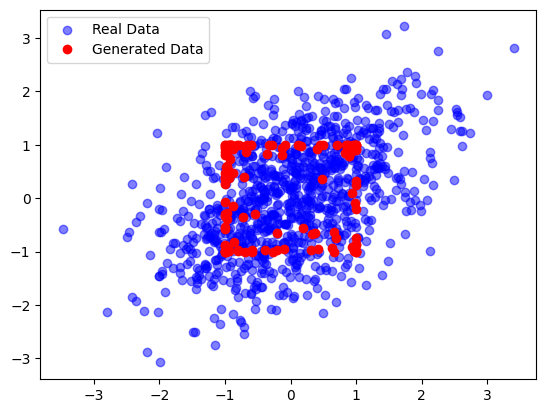

In [18]:
real_mean = [0, 0]
real_cov = [[1, 0.5], [0.5, 1]]
x_real = np.random.multivariate_normal(real_mean, real_cov, 1000)

# Set up the plot
fig, ax = plt.subplots()
real_data_plot = ax.scatter(x_real[:, 0], x_real[:, 1], color='blue', alpha=0.5, label='Real Data')
generated_data_plot, = ax.plot([], [], 'ro', label='Generated Data')
ax.legend()

# Initialize the lists to store the frames for animation
frames_x = []
frames_y = []

# Training loop
for epoch in range(epochs):
    # Generate fake data
    z = np.random.normal(size=(batch_size, gen_input_dim))
    x_fake = generator.predict(z)

    # Train the discriminator
    discriminator.trainable = True
    discriminator.train_on_batch(x_real, np.ones((len(x_real), 1)))
    discriminator.train_on_batch(x_fake, np.zeros((batch_size, 1)))

    # Train the generator
    discriminator.trainable = False
    gan.train_on_batch(z, np.ones((batch_size, 1)))

    # Save the generated data for animation
    frames_x.append(x_fake[:, 0])
    frames_y.append(x_fake[:, 1])

# Animation function
def animate(i):
    generated_data_plot.set_data(frames_x[i], frames_y[i])
    return generated_data_plot,

# Create the animation
ani = FuncAnimation(fig, animate, frames=range(epochs), interval=100, blit=True, repeat=False)

# Save the animation
ani.save('gan_training.gif', writer=PillowWriter(fps=20))

# Show the plot
plt.show()

h) Tune the above model in order to generate data as close as possible to the real data. (15points)

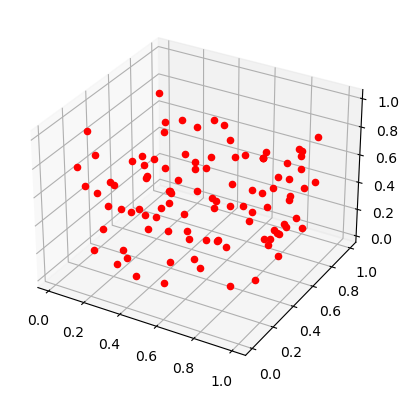

In [30]:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import numpy as np

weights = np.random.rand(100)  
biases = np.random.rand(100)   
losses = np.random.rand(100)   

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


def update_graph(num):
    ax.scatter(weights[num], biases[num], losses[num], color='r')
    return fig,


ani = animation.FuncAnimation(fig, update_graph, frames=range(len(weights)), blit=False)


ani.save('./training_animation.gif', writer='pillow', fps=10)
